In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

### Data preparation
Check if the missing values are presented in the features.   
If there are missing values:   
For caterogiral features, replace them with 'NA'   
For numerical features, replace with with 0.0   
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1   

In [3]:
!wget $data -O data.csv

--2025-10-24 17:42:01--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  78.98K  --.-KB/s    in 0.003s  

2025-10-24 17:42:01 (29.4 MB/s) - ‘data.csv’ saved [80876/80876]



In [4]:
df = pd.read_csv('data.csv')

In [5]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [6]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [7]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [8]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [9]:
df[df.columns[df.dtypes == 'object']] = df[df.columns[df.dtypes == 'object']].fillna('NA')

In [10]:
df['annual_income'] = df['annual_income'].fillna(0.0)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df, test_size=0.25, random_state=1)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [30]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [15]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [16]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']

##### Q1

### Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.   

Let's do that   

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.   
Use the training dataset for that   
If your AUC is < 0.5, invert this variable by putting "-" in front   

(e.g. -df_train['balance'])   

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.   

Which numerical variable (among the following 4) has the highest AUC?   

lead_score   
number_of_courses_viewed   
interaction_count   
annual_income   

In [17]:
for n in numerical:
    score = roc_auc_score(y_train, df_train[n])

    if score < 0.5:
        score = roc_auc_score(y_train, -df_train[n])
    print(f"{n}, {score}")

number_of_courses_viewed, 0.7569581669119193
annual_income, 0.5553797911849204
interaction_count, 0.7322489664354285
lead_score, 0.6161568915983464


### Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:   

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)   
What's the AUC of this model on the validation dataset? (round to 3 digits)   

0.32   
0.52   
0.72   
0.92   

In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [21]:
dv = DictVectorizer(sparse=False)
dicts_train = df_train[numerical + categorical].to_dict(orient='records')
X_train = dv.fit_transform(dicts_train)

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
dicts_val = df_val[numerical + categorical].to_dict(orient='records')
X_val = dv.transform(dicts_val)

y_pred = model.predict_proba(X_val)[:,1]
decision = (y_pred >= 0.5)
(y_val == decision).mean()

np.float64(0.825136612021858)

In [32]:
score = roc_auc_score(y_val, y_pred)
score=round(score,3)
score

0.887

### Question 3: Precision and Recall   
Now let's compute precision and recall for our model.   

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01   
For each threshold, compute precision and recall   
Plot them   
At which threshold precision and recall curves intersect?   

0.145   
0.345   
0.545   
0.745   

In [36]:
thresholds = np.arange(0, 1.01, 0.01)

precisions = []
recalls = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)
    
    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    
    fp = (actual_negative & predicted_positive).sum()
    fn = (actual_positive & predicted_negative).sum()
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    precisions.append(precision)
    recalls.append(recall)

precisions = np.array(precisions)
recalls = np.array(recalls)

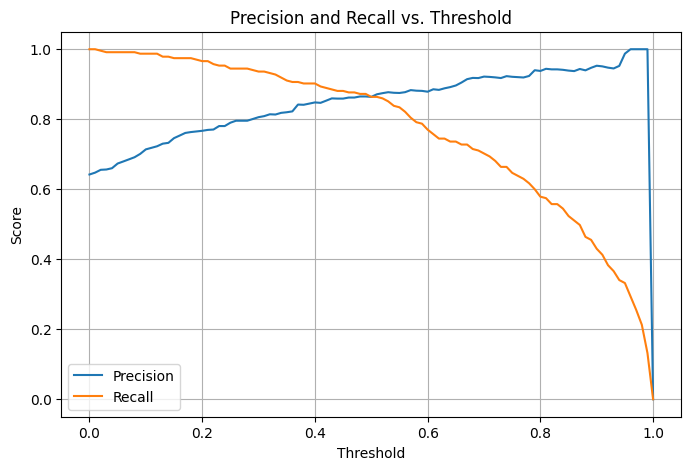

In [38]:
plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# np.argmin() gives you the index of the smallest value in an array.

# Find threshold where the absolute difference is smallest
idx = np.argmin(np.abs(precisions - recalls))
intersection_threshold = thresholds[idx]

print(f"Precision and Recall curves intersect around threshold = {intersection_threshold:.4f}")


Precision and Recall curves intersect around threshold = 0.5000


#### Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score   
- a metrics that takes into account both   

This is the formula for computing F1:   

F1 = 2 * (P * R) / (P + R)   

Where P is precision and R is recall.   

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01   

At which threshold F1 is maximal?   

0.14   
0.34   
0.54   
0.74   

In [43]:
thresholds = np.arange(0, 1.01, 0.01)

precisions = []
recalls = []
F1s = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)
    
    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    
    fp = (actual_negative & predicted_positive).sum()
    fn = (actual_positive & predicted_negative).sum()
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    F1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


    precisions.append(precision)
    recalls.append(recall)
    F1s.append(F1)
    
precisions = np.array(precisions)
recalls = np.array(recalls)
F1s = np.array(F1s)

In [47]:
idx = np.argmax(F1s)
max_threshold = thresholds[idx]
print(round(max_threshold)

0.4
